In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
time_series=pd.read_csv("RELIANCE.NS.csv",index_col=0)

In [24]:
# for i in range(time_series["Date"].shape[0]):
#     time_series["Date"][i]=float(time_series["Date"][i].replace('-', ''))

In [25]:
time_series.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
# fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
# for i, ax in enumerate(axes.flatten()):
#     data = time_series[time_series.columns[i]]
#     ax.plot(data, color='red', linewidth=1)
#     # Decorations
#     ax.set_title(time_series.columns[i])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout();

In [27]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(time_series, variables = time_series.columns)   

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
Open_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0360
High_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
Low_y,0.0011,0.0000,1.0000,0.0000,0.0000,0.0163
Close_y,0.5233,0.1434,0.3311,1.0000,0.5623,0.1840
Adj Close_y,0.5197,0.1432,0.3240,0.5511,1.0000,0.1862
Volume_y,0.0116,0.0595,0.1227,0.4017,0.4012,1.0000


In [28]:
time_series.tail(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,2617.000000,2631.300049,2586.000000,2606.600098,2606.600098,4371179
2022-08-23,2594.000000,2653.199951,2591.350098,2646.800049,2646.800049,4466619
2022-08-24,2640.100098,2670.000000,2635.350098,2639.750000,2639.750000,4785579
2022-08-25,2648.949951,2662.899902,2622.600098,2632.050049,2632.050049,3632902
2022-08-26,2633.000000,2650.000000,2607.000000,2618.000000,2618.000000,4957449
2022-08-29,2585.000000,2655.000000,2578.050049,2597.649902,2597.649902,9155684
2022-08-30,2614.000000,2645.250000,2576.600098,2637.949951,2637.949951,10678670


In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [31]:
for i in time_series.columns:
    adf_test(time_series[i],i)
    print("-"*20)

Augmented Dickey-Fuller Test: Open
ADF test statistic       -3.224315
p-value                   0.018620
# lags used               0.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
--------------------
Augmented Dickey-Fuller Test: High
ADF test statistic       -3.132771
p-value                   0.024221
# lags used               1.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
--------------------
Augmented Dickey-Fuller Test: Low
ADF test statistic       -3.257388
p-value                   0.016894
# lags used               1.000000
# observations          247.000000
cr

In [32]:
# time_series["Date"]=time_series["Date"].diff()

In [33]:
# for i in time_series.columns:
#     adf_test(time_series[i],i)
#     print("-"*20)

In [34]:
time_series.dropna(inplace=True)

In [35]:
train=time_series[:-7]
test=time_series[-7:]

In [185]:
global di
di={}
# for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
#     d[i]=0


In [186]:
print(di)

{}


In [187]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [188]:
# pm.auto_arima?

In [189]:
def predict(i):
    global di
    
    model = pm.auto_arima(time_series[i], d=1, D=1,seasonal=True, m=7, trend='c',start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)

    #plotting the data
    # train[i].plot()
    # test[i].plot()
    model = SARIMAX(train[i],order=(1,1,0),seasonal_order=(0,1,1,12))
    results = model.fit()
    # print("Results of SARIMAX on train")
    # print(results.summary())
    forecast = results.get_forecast(steps=len(test))
    mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    d = mean.index
    plt.figure(figsize=(8,5))
    # Plot past  levels
    plt.plot(d, time_series[i][-7:], label='Oiginal '+i, color = 'red')
    # Prediction Mean
    plt.plot(d, mean, label='Forecasted '+i, color= 'green')
    # Shade of space between  confidence intervals
    plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
    alpha=0.2, color= 'blue')
    # Plot legend 
    plt.legend()
    plt.savefig('p')
    plt.show()
    # print(type(mean))
    # mean.reset_index(inplace=True, drop=True)
    
    # df_forecast=pd.DataFrame(data=mean,index=time_series.index[-7:], columns=[i])
    # l=[df,df_forecast]
    # df=pd.concat(l,axis=1, join='inner')
    di[i]=mean
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2745.767, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2663.041, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2746.733, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2640.452, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2640.724, Time=0.38 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2642.113, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=2642.683, Time=0.93 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2640.623, Time=0.34 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=2641.280, Time=0.98 sec
 ARIMA(1,1,0)(2,1,0)[7] intercept   : AIC=2640.452, Time=0.36 sec

Best model:  ARIMA(1,1,0)(2,1,0)[7] intercept
Total 

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


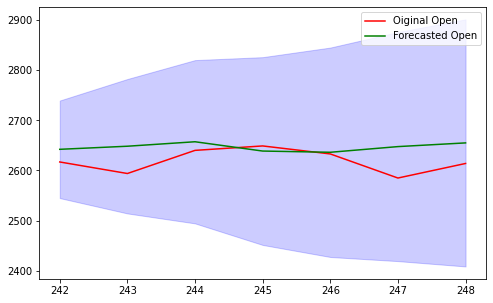

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2639.210, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2568.042, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2637.308, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2537.034, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2538.739, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2539.005, Time=0.45 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=2539.011, Time=1.14 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2537.185, Time=0.60 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=2540.320, Time=0.98 sec
 ARIMA(1,1,0)(2,1,0)[7] intercept   : AIC=2537.034, Time=0.48 sec

Best model:  ARIMA(1,1,0)(2,1,0)[7]          
Total 

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


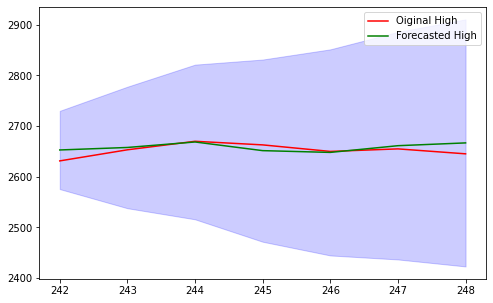

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2677.007, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2573.762, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2675.577, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2548.352, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2553.198, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2550.203, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2548.267, Time=0.54 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2573.534, Time=0.47 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.50 sec
 A

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


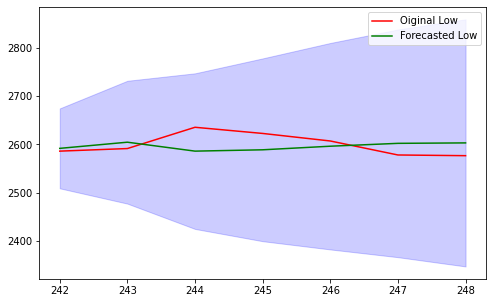

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2709.948, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2622.013, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2711.840, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2604.619, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2602.680, Time=0.38 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=2620.348, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2604.622, Time=0.59 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=2606.599, Time=0.70 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=2602.680, Time=0.26 sec

Best model:  ARIMA(0,1,0)(2,1,0)[7] intercept
Total fit t

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


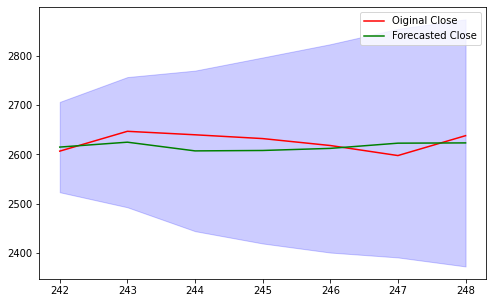

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2708.731, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2620.690, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2710.616, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2603.232, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2601.288, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=2619.011, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2603.235, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=2605.213, Time=0.72 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=2601.288, Time=0.31 sec

Best model:  ARIMA(0,1,0)(2,1,0)[7] intercept
Total fit t

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


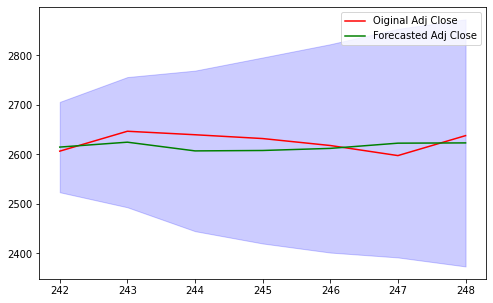

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=8145.549, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=8252.916, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8151.693, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=8079.818, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=8174.292, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=8079.437, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=8112.815, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=8079.482, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=8076.041, Time=0.60 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=8080.801, Time=0.39 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=8147.050, Time=0.76 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=8077.965, Time=0.65 sec
 ARIMA(0,1,2)(1,1,2)[7]             : AIC=8070.900, Time=0.92 sec
 ARIMA(0,1,2)(0,1,2)[7]             : 

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


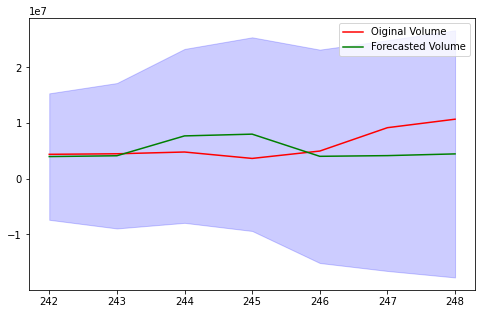

In [190]:

for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    predict(i)

In [191]:
df=pd.DataFrame(di)

In [192]:
print(di)

{'Open': 242    2642.207999
243    2648.374300
244    2657.288890
245    2638.759628
246    2636.311437
247    2647.631597
248    2655.002287
Name: predicted_mean, dtype: float64, 'High': 242    2652.865732
243    2657.800182
244    2668.635716
245    2651.545953
246    2648.065835
247    2661.302211
248    2666.816875
Name: predicted_mean, dtype: float64, 'Low': 242    2591.728439
243    2604.485021
244    2586.015361
245    2588.765584
246    2596.192165
247    2602.115307
248    2603.035997
Name: predicted_mean, dtype: float64, 'Close': 242    2614.825496
243    2624.762382
244    2607.109028
245    2607.933950
246    2612.186012
247    2622.755014
248    2623.302395
Name: predicted_mean, dtype: float64, 'Adj Close': 242    2614.825927
243    2624.729575
244    2607.122937
245    2607.947951
246    2612.188303
247    2622.731044
248    2623.274528
Name: predicted_mean, dtype: float64, 'Volume': 242    3.965381e+06
243    4.112557e+06
244    7.679729e+06
245    7.995330e+06
246    4.

In [193]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
242,2642.207999,2652.865732,2591.728439,2614.825496,2614.825927,3.965381e+06
243,2648.374300,2657.800182,2604.485021,2624.762382,2624.729575,4.112557e+06
244,2657.288890,2668.635716,2586.015361,2607.109028,2607.122937,7.679729e+06
245,2638.759628,2651.545953,2588.765584,2607.933950,2607.947951,7.995330e+06
246,2636.311437,2648.065835,2596.192165,2612.186012,2612.188303,4.011907e+06


In [194]:
df.index=time_series.index[-7:]

In [195]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,2642.207999,2652.865732,2591.728439,2614.825496,2614.825927,3.965381e+06
2022-08-23,2648.374300,2657.800182,2604.485021,2624.762382,2624.729575,4.112557e+06
2022-08-24,2657.288890,2668.635716,2586.015361,2607.109028,2607.122937,7.679729e+06
2022-08-25,2638.759628,2651.545953,2588.765584,2607.933950,2607.947951,7.995330e+06
2022-08-26,2636.311437,2648.065835,2596.192165,2612.186012,2612.188303,4.011907e+06


In [197]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
def adjust(val, length= 6): return str(val).ljust(length)
for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    print('Forecast Accuracy of: ',i)
    accuracy_prod = forecast_accuracy(df[i].values, test[i])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))


Forecast Accuracy of:  Open
mape   :  0.0117
me     :  27.6466
mae    :  30.5581
mpe    :  0.0106
rmse   :  37.0447
corr   :  -0.2373
minmax :  0.0115
Forecast Accuracy of:  High
mape   :  0.0037
me     :  5.6261
mae    :  9.8125
mpe    :  0.0021
rmse   :  12.6807
corr   :  0.3364
minmax :  0.0037
Forecast Accuracy of:  Low
mape   :  0.0089
me     :  -3.5161
mae    :  23.3345
mpe    :  -0.0013
rmse   :  27.1999
corr   :  -0.818
minmax :  0.0089
Forecast Accuracy of:  Close
mape   :  0.0072
me     :  -9.418
mae    :  18.941
mpe    :  -0.0035
rmse   :  20.9726
corr   :  -0.0475
minmax :  0.0072
Forecast Accuracy of:  Adj Close
mape   :  0.0072
me     :  -9.4257
mae    :  18.942
mpe    :  -0.0035
rmse   :  20.9708
corr   :  -0.0478
minmax :  0.0072
Forecast Accuracy of:  Volume
mape   :  0.4715
me     :  -814255.6736
mae    :  2887563.8272
mpe    :  0.0444
rmse   :  3637505.4966
corr   :  -0.3885
minmax :  0.3453


C:\Users\taran\AppData\Local\Temp/ipykernel_22064/2282468115.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\taran\AppData\Local\Temp/ipykernel_22064/2282468115.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


## VAR MOdels

In [13]:
from statsmodels.tsa.api import VAR

In [14]:
model = VAR(train)
for i in range(1,20):
    
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  52.47981113065059
BIC:  53.087120139806636

Order = 2
AIC:  52.60057295569257
BIC:  53.73178060577872

Order = 3
AIC:  52.79677238319227
BIC:  54.455001859845794

Order = 4
AIC:  52.92021418753603
BIC:  55.108620074303765

Order = 5
AIC:  53.03481378534251
BIC:  55.75658250370172

Order = 6
AIC:  53.196288997526494
BIC:  56.45463925479635

Order = 7
AIC:  53.3330007254377
BIC:  57.13118397075341

Order = 8
AIC:  53.55026627645941
BIC:  57.89156716498576

Order = 9
AIC:  53.70406266487181
BIC:  58.591799530436965

Order = 10
AIC:  53.879549535897304
BIC:  59.31707487223295

Order = 11
AIC:  54.026942695992034
BIC:  60.01764364677022

Order = 12
AIC:  54.16982369599614
BIC:  60.71712255385858

Order = 13
AIC:  54.30248477614312
BIC:  61.40983949092352

Order = 14
AIC:  54.28745131642502
BIC:  61.95835601277048

Order = 15
AIC:  54.39652828648877
BIC:  62.634513791091614

Order = 16
AIC:  54.50669437722744
BIC:  63.315328755884394

Order = 17
AIC:  54.57121464250127
BIC:  

C:\Users\taran\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Here we take order 1 as AIC doesnot decrease at any given order point

In [15]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,56.75,56.83,4.407e+24,56.78
1,52.57*,53.20*,6.764e+22*,52.82*
2,52.67,53.84,7.525e+22,53.14
3,52.86,54.56,9.041e+22,53.54
4,53.00,55.24,1.047e+23,53.90
5,53.19,55.97,1.272e+23,54.31
6,53.33,56.65,1.474e+23,54.67
7,53.46,57.32,1.692e+23,55.01
8,53.64,58.04,2.058e+23,55.41
9,53.77,58.70,2.381e+23,55.76


In [16]:
result = model.fit(1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 31, Aug, 2022
Time:                     17:50:21
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    53.0871
Nobs:                     241.000    HQIC:                   52.7245
Log likelihood:          -8333.60    FPE:                6.19063e+22
AIC:                      52.4798    Det(Omega_mle):     5.21347e+22
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               31.280228        27.997683            1.117           0.264
L1.Open             -0.093211         0.092683           -1.006           0.315
L1.High              0.023163         0.121631            0.190  

In [17]:
def adjust(val, length= 6): return str(val).ljust(length)

In [34]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(result.resid)

for col, val in zip(time_series.columns, out):
    print(adjust(col), ':', round(val, 2))

Open   : 1.87
High   : 2.0
Low    : 1.87
Close  : 1.94
Adj Close : 1.94
Volume : 2.05


In [19]:
lag_order = result.k_ar
print(lag_order)

1


In [20]:
lagged_Values = train.values[-1:]

In [21]:
pred = result.forecast(y=lagged_Values, steps=7) 

# idx = pd.date_range('2015-01-01', periods=12, freq='MS')
df_forecast=pd.DataFrame(data=pred,index=time_series.index[-7:], columns=[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [22]:
test_obs=7

In [23]:
# for i,j,k,l in zip( ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],[ 'Open1', 'High1', 'Low1', 'Close1', 'Adj Close1', 'Volume1'],[ 'Open2', 'High2', 'Low2', 'Close2', 'Adj Close2', 'Volume2'],[ 'OpenForecast', 'HighForecast', 'LowForecast', 'CloseForecast', 'Adj CloseForecast', 'VolumeForecast']):
#     df_forecast[j] = (time_series[i].iloc[-test_obs-1]-time_series[i].iloc[-test_obs-2]) + df_forecast[k].cumsum()
#     df_forecast[l] = time_series[i].iloc[-test_obs-1] + df_forecast[j].cumsum()

In [24]:
df_forecast

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,2601.298970,2622.985235,2557.122766,2574.078057,2573.992056,5.323920e+06
2022-08-23,2562.487786,2586.453810,2520.016171,2538.657188,2538.443582,5.848935e+06
2022-08-24,2527.907830,2552.924571,2487.203735,2506.895488,2506.535797,6.030867e+06
2022-08-25,2496.982704,2522.640913,2457.870083,2478.465167,2477.946524,6.110139e+06
2022-08-26,2469.349858,2495.484267,2431.692751,2453.092783,2452.405199,6.158317e+06
2022-08-29,2444.733258,2471.269925,2408.411753,2430.547887,2429.683445,6.196030e+06
2022-08-30,2422.903153,2449.799177,2387.805802,2410.621983,2409.574453,6.229895e+06


In [25]:
test_original = time_series[-test_obs:]


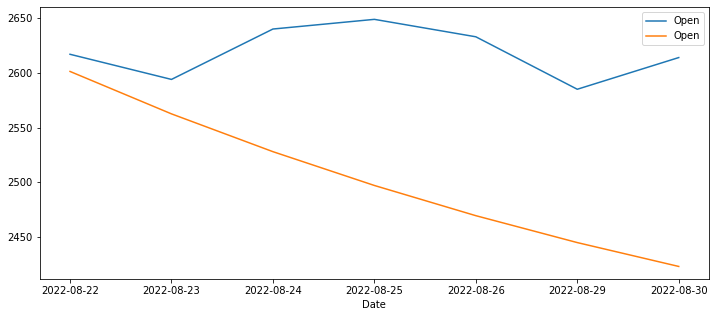

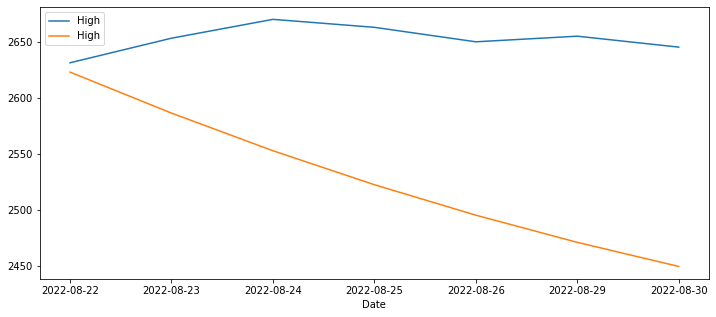

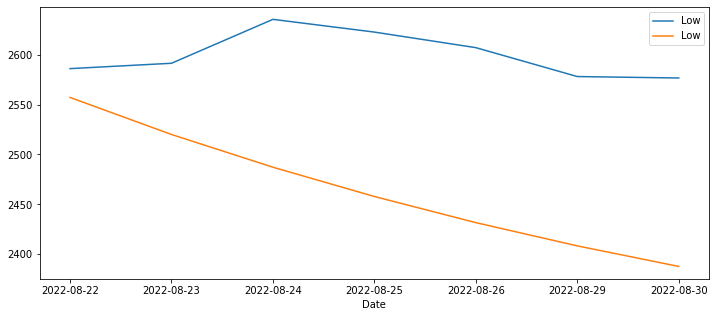

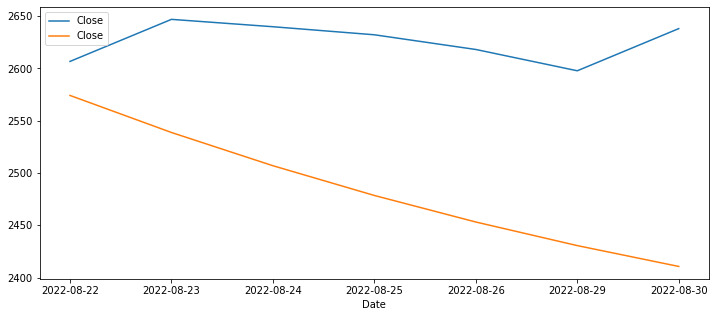

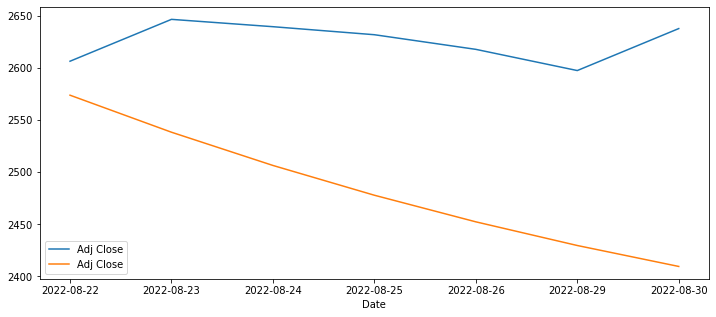

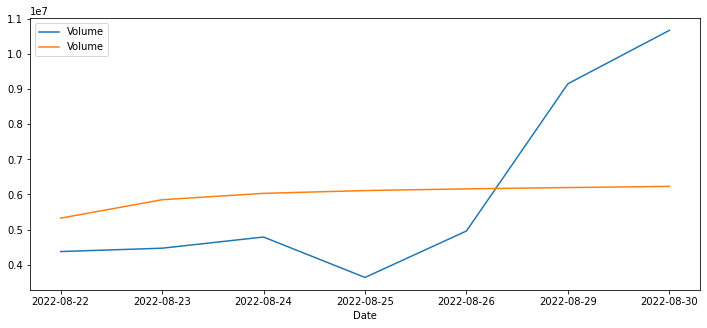

In [26]:
for i,j in zip([ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']):
    test_original[i].plot(figsize=(12,5),legend=True)
    df_forecast[j].plot(legend=True)
    plt.show()

There is no need to get the outputs for VAR as the graph is already showing VAR is not good model for it

In [198]:
df.to_csv("output.csv")